In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import operator
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import datasets

In [2]:
df = datasets.load_iris()

In [3]:
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X, y = df.data, df.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 56) 

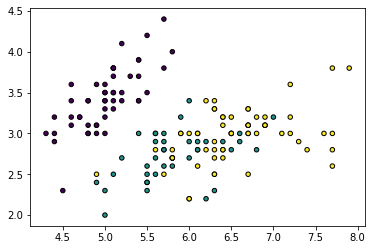

In [20]:
plt.figure()
plt.scatter(X[:,0], X[:, 1], c=y, edgecolor = 'k', s = 20)
plt.show()

In [21]:
def euclidean(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)


In [22]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self, x):
        distances = [euclidean(x, x_train) for x_train in self.X_train]
        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
        

In [26]:
clf = KNN(k = 4)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [27]:
acc = np.sum(predictions == y_test)/ len(y_test)

In [28]:
acc

0.9666666666666667

Using scikit learn

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(4)
classifier.fit(X_train, y_train)
classifier.predict(X_test)


array([2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2,
       1, 1, 0, 2, 2, 1, 1, 1])

In [30]:
classifier.score(X_test, y_test)

0.9666666666666667